## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

np.random.seed(42)
sns.set(rc={"figure.figsize": (8, 8)})
sns.set_style("ticks")

## Dataset

Untuk membandingkan metrik yang berbeda, akan menggunakan [Iris Plants Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) yang disediakan oleh sckit-learn di `dataset` module. Dataset ini digunakan untuk klasifikasi antara jenis tanaman.

In [2]:
data = load_iris()
print(data.DESCR[:760])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83  


In [3]:
print(f"Tipe dari tanaman (targets) adalah {data.target_names}")

Tipe dari tanaman (targets) adalah ['setosa' 'versicolor' 'virginica']


bagaiaman dimensi datanya? telihat dari 150 contoh dan setiap contoh memiliki 4 features.

In [4]:
X = data.data  
y = data.target  
print(f"Shape dari features adalah {X.shape}, dan shape dari target adalah {y.shape}")

Shape dari features adalah (150, 4), dan shape dari target adalah (150,)


## Spliting data testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42, stratify=y)

In [6]:
y_train[:10]

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2])

## Traning dan Predicting Data

Dalam contoh ini akan digunakan SVM untuk prediksi data

In [7]:
classifier = svm.SVC(kernel='linear' , C=0.01, probability=True, verbose=True)

In [8]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=0.01, kernel='linear', probability=True, verbose=True)

In [9]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [10]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [11]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([0.01490496, 0.53353542, 0.82624463, 0.84271529, 0.01308683]),
 array([0, 1, 1, 1, 0]),
 array([0, 2, 1, 1, 0]))

## Confusion Matrix

In [12]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  8]], dtype=int64)

In [13]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [14]:
conf = get_confusion_matrix(y_test, y_preds)
conf

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  8]])

Text(0.5, 115.24999999999993, 'Predicted label')

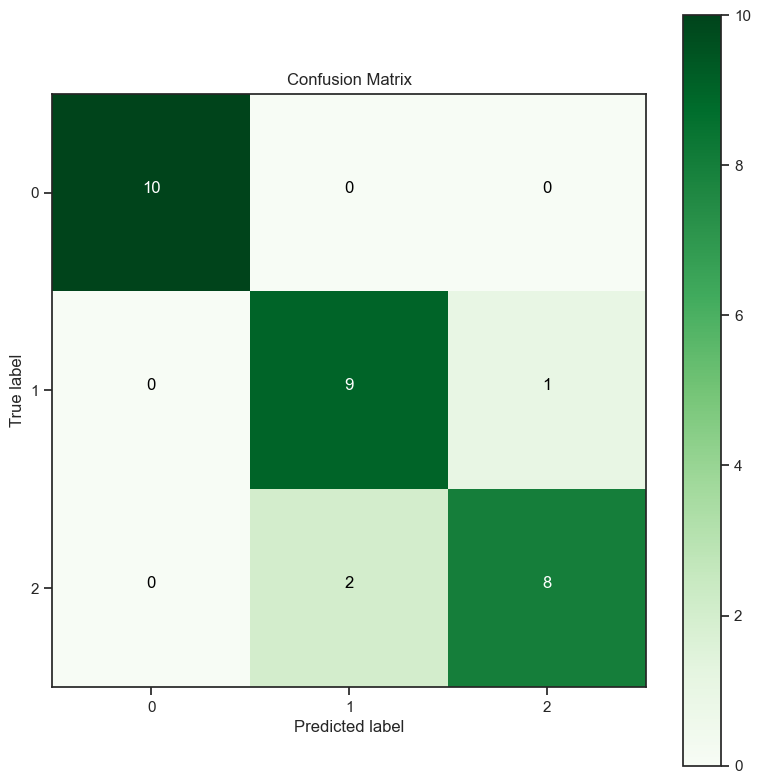

In [15]:
classes = [0, 1, 2]

plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [16]:
# confiusion matrics for sentosa
TP_0 = true_pos = 10
TN_0 = true_neg = 20
FP_0 = false_pos = 0
FN_0 = false_neg = 0

results = {}

In [17]:
# confiusion matrics for versicolour
TP_1 = true_pos = 9
TN_1 = true_neg = 18
FP_1 = false_pos = 2
FN_1 = false_neg = 1

results = {}

In [18]:
# confiusion matrics for virginica
TP_2 = true_pos = 8
TN_2 = true_neg = 19
FP_2 = false_pos = 1
FN_2 = false_neg = 2

results = {}

## Matthew's correlation coefficient

In [19]:
metric = "MCC Sentosa"
num = TP_0 * TN_0 - FP_0 * FN_0
den = ((TP_0 + FP_0) * (TP_0 + FN_0) * (TN_0 + FP_0) * (TN_0 + FN_0)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC Sentosa is  1.000


In [20]:
metric = "MCC Versicolour"
num = TP_1 * TN_1 - FP_1 * FN_1
den = ((TP_1 + FP_1) * (TP_1 + FN_1) * (TN_1 + FP_1) * (TN_1 + FN_1)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC Versicolour is  0.783


In [21]:
metric = "MCC Virginica"
num = TP_2 * TN_2 - FP_2 * FN_2
den = ((TP_2 + FP_2) * (TP_2 + FN_2) * (TN_2 + FP_2) * (TN_2 + FN_2)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC Virginica is  0.772


In [22]:
r = "Mean MCC"
num = (1 + 0.783 + 0.772)
den = 3
results[r] = num / den
print(f"{r} is {results[r]: .3f}")

Mean MCC is  0.852


## Membandingkan matrix yang pernah dihitung

In [23]:
print(f"Calculated dan Actual Matthew's correlation coefficient: {results['Mean MCC']: .3f}, {metrics.matthews_corrcoef(y_test, y_preds): .3f}")

Calculated dan Actual Matthew's correlation coefficient:  0.852,  0.851
